In [188]:
import numpy as np
import matplotlib.pyplot as plt

# given 4 points (x1,px1), (x2,px2), (x3,px3), (x4,px4) compute area of the quadrilateral
def area_quadrilateral(x1, px1, x2, px2, x3, px3, x4, px4):
    # split into two triangles
    area1 = 0.5 * np.abs(x1*(px2 - px3) + x2*(px3 - px1) + x3*(px1 - px2))
    area2 = 0.5 * np.abs(x1*(px3 - px4) + x3*(px4 - px1) + x4*(px1 - px3))
    return area1 + area2    

r_points = 500

r_x = np.linspace(0, 1, r_points)

theta_x_points = 1000
theta_x = np.linspace(0, 2 * np.pi, theta_x_points)[:-1]
r_x_grid, theta_x_grid = np.meshgrid(r_x, theta_x, indexing='ij')

x = r_x_grid*np.cos(theta_x_grid)
px = r_x_grid*np.sin(theta_x_grid)



area = []
for ii in range(1,r_points):
    for jj in range(theta_x_points-1):

        assert 0<ii<r_points and -1<jj<(theta_x_points-1)
        area.append(area_quadrilateral(x[ii-1,jj-1], px[ii-1,jj-1],
                          x[ii-1,jj], px[ii-1,jj],
                          x[ii,jj], px[ii,jj],
                          x[ii,jj-1], px[ii,jj-1]))





In [189]:
def annulus(x, y, annulus_inner, annulus_outer):
    # Convert to numpy arrays (no effect if they are already arrays)
    x = np.asarray(x)
    y = np.asarray(y)

    r2 = x**2 + y**2
    return np.where((annulus_inner**2 <= r2) & (r2 <= annulus_outer**2), 1, 0)


annulus_inner = .3
annulus_outer = .7

weight = []
my_x = []
my_px = []

for ii in range(1,r_points):
    for jj in range(theta_x_points-1):

        assert 0<ii<r_points and -1<jj<(theta_x_points-1)        
        weight.append(area_quadrilateral(x[ii-1,jj-1], px[ii-1,jj-1],
                          x[ii-1,jj], px[ii-1,jj],
                          x[ii,jj], px[ii,jj],
                          x[ii,jj-1], px[ii,jj-1])*annulus(x[ii,jj], px[ii,jj], annulus_inner, annulus_outer))
        
        my_x.append(x[ii,jj])
        my_px.append(px[ii,jj])



np.float64(1.2566526195114165)

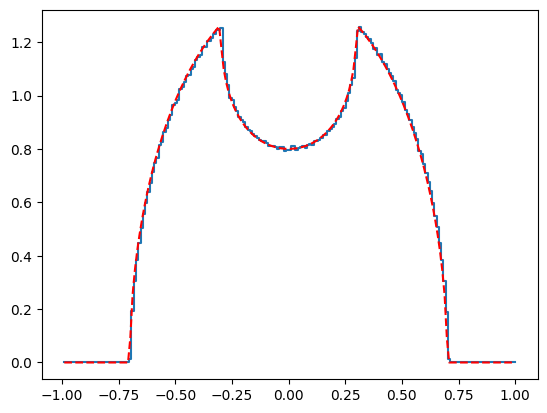

In [193]:

steps = 200
xbins = np.linspace(min(my_x), max(my_x), steps)
ybins = np.linspace(min(my_px), max(my_px), steps)

# Build 2D weighted histogram
H, xedges, yedges = np.histogram2d(my_x, my_px, bins=[xbins, ybins], weights=weight)

# Projection on X: sum over Y bins
projX = H.sum(axis=1)
plt.step(xedges[1:], projX/np.trapezoid(projX, xedges[1:])*np.sum(weight), where='mid')

# define the abel transform of a circle as 2*sqrt(R^2 - x^2)
R = annulus_outer
abel_circle = 2 * np.sqrt(np.clip(R**2 - xedges[1:]**2, 0, None))-2 * np.sqrt(np.clip(annulus_inner**2 - xedges[1:]**2, 0, None))

plt.plot(xedges[1:],abel_circle,'--r')
np.trapezoid(abel_circle, xedges[1:])

In [ ]:
np.sum(weight)-np.pi*(annulus_outer**2 - annulus_inner**2)

np.float64(-1.3331567226604335e-05)